# Setting up my environment


In [ ]:
#installing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Mount Google Drive



In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading and exploring data

In [ ]:
#set the path to my Kaggle dataset
train_dir = '/content/drive/MyDrive/Kaggle/dataset/Train'
test_dir = '/content/drive/MyDrive/Kaggle/dataset/Test'

In [ ]:
print(os.listdir(train_dir))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Kaggle/dataset/Train'

In [ ]:
#count the number of images in each class (for apples)
fresh_count = len(os.listdir(os.path.join(data_dir, 'freshapples')))
stale_count = len(os.listdir(os.path.join(data_dir, 'rottenapples')))
print(f"Fresh images: {fresh_count}")
print(f"Stale images: {stale_count}")

NameError: name 'data_dir' is not defined

# Data preparation



In [ ]:
#create a dataframe with image paths and labels
def create_dataframe(data_dir):
    image_paths = []
    labels = []
    for label in os.listdir(data_dir):
        for image_name in os.listdir(os.path.join(data_dir, label)):
            image_paths.append(os.path.join(data_dir, label, image_name))
            labels.append(label)
    return pd.DataFrame({'image_path': image_paths, 'label': labels})

df = create_dataframe(data_dir)

In [ ]:
#split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
#for non-binary classification
def create_dataframe(data_dir):
    image_paths = []
    labels = []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for image_name in os.listdir(category_path):
                image_paths.append(os.path.join(category_path, image_name))
                labels.append(category)
    return pd.DataFrame({'image_path': image_paths, 'label': labels})

# Create DataFrames for train and test sets
train_df = create_dataframe('/content/drive/MyDrive/Kaggle/dataset/Train')
test_df = create_dataframe('/content/drive/MyDrive/Kaggle/dataset/Test')

# Get the number of classes
num_classes = len(train_df['label'].unique())
print(f"Number of classes: {num_classes}")

Number of classes: 16


In [ ]:
def reduce_dataset(df, sample_size):
    return df.groupby('label').apply(lambda x: x.sample(min(len(x), sample_size))).reset_index(drop=True)

# Reduce the training dataset
sample_size_per_class = 100  # Adjust this value based on your needs
reduced_train_df = reduce_dataset(train_df, sample_size_per_class)

print("Original dataset size:", len(train_df))
print("Reduced dataset size:", len(reduced_train_df))
print(reduced_train_df['label'].value_counts())

Original dataset size: 17947
Reduced dataset size: 1600
label
freshbanana          100
freshbittergroud     100
freshcapsicum        100
freshcucumber        100
freshokra            100
freshoranges         100
freshpotato          100
freshtomato          100
rottenbanana         100
rottenbittergroud    100
rottencapsicum       100
rottencucumber       100
rottenokra           100
rottenoranges        100
rottenpotato         100
rottentomato         100
Name: count, dtype: int64


<ipython-input-13-4f6d2877c33a>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('label').apply(lambda x: x.sample(min(len(x), sample_size))).reset_index(drop=True)


In [ ]:
# Split train data into train and validation
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

# Data augmentation and preprocessing with ImageDataGenerator

In [ ]:
#settting up data augmentation and preprocessing using ImageDataGenerator
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


In [ ]:
#for non-binary classification
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 14357 validated image filenames belonging to 16 classes.
Found 3590 validated image filenames belonging to 16 classes.
Found 6738 validated image filenames belonging to 14 classes.


# Build the CNN Model

In [ ]:
#creating a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
#for non-binary classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Changed to num_classes and softmax
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Changed to categorical_crossentropy
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,171,024 (42.61 MB)

 Trainable params: 11,171,024 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [ ]:
epochs = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 23/448 ━━━━━━━━━━━━━━━━━━━━ 2:58:27 25s/step - accuracy: 0.1154 - loss: 3.3421

KeyboardInterrupt: 

# Evaluate the Model

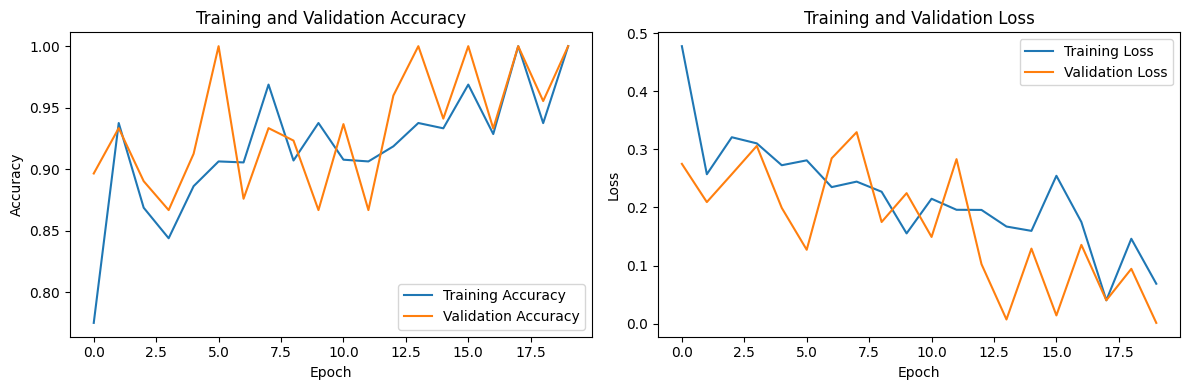

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#Implementing the Model

In [ ]:
def predict_image(image_path):
  img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  img_array /= 255.0

  predictions = model.predict(img_array)
  class_names = ['freshapples', 'rottenapples']
  predicted_class = class_names[int(round(predictions[0][0]))]
  confidence = predictions[0][0] if predicted_class == 'freshapples' else 1 - predictions[0][0]

  return predicted_class, confidence

#example
image_path = '/path/to/test/image.jpg'
predicted_class, confidence = predict_image(image_path)
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

In [ ]:
#for non-binary classification
def predict_image(image_path):
  img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  img_array /= 255.0

  predictions = model.predict(img_array)
  class_names = list(train_generator.class_indices.keys())
  predicted_class = class_names[np.argmax(predictions)]
  confidence = np.max(predictions)

  return predicted_class, confidence

# Example usage
image_path = '/path/to/test/image.jpg'
predicted_class, confidence = predict_image(image_path, model)
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")